In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('HousePricePrediction.csv')

In [4]:
data.head(n=5)

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [5]:
data.describe(include=[np.number], percentiles=[.5]) \
.transpose().drop("count", axis=1)

,mean,std,min,50%,max
Id,1459.000000,842.787043,0.0,1459.0,2918.0
MSSubClass,57.137718,42.517628,20.0,50.0,190.0
LotArea,10168.114080,7886.996359,1300.0,9453.0,215245.0
OverallCond,5.564577,1.113131,1.0,5.0,9.0
YearBuilt,1971.312778,30.291442,1872.0,1973.0,2010.0
YearRemodAdd,1984.264474,20.894344,1950.0,1993.0,2010.0
BsmtFinSF2,49.582248,169.205611,0.0,0.0,1526.0
TotalBsmtSF,1051.777587,440.766258,0.0,989.5,6110.0
SalePrice,180921.195890,79442.502883,34900.0,163000.0,755000.0


In [6]:
data.describe

<bound method NDFrame.describe of         Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0        0          60       RL     8450    Inside     1Fam            5   
1        1          20       RL     9600       FR2     1Fam            8   
2        2          60       RL    11250    Inside     1Fam            5   
3        3          70       RL     9550    Corner     1Fam            5   
4        4          60       RL    14260       FR2     1Fam            5   
...    ...         ...      ...      ...       ...      ...          ...   
2914  2914         160       RM     1936    Inside    Twnhs            7   
2915  2915         160       RM     1894    Inside   TwnhsE            5   
2916  2916          20       RL    20000    Inside     1Fam            7   
2917  2917          85       RL    10441    Inside     1Fam            5   
2918  2918          60       RL     9627    Inside     1Fam            5   

      YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2

In [7]:
num_missing = data.isna().sum()

num_missing = num_missing[num_missing > 0]

percent_missing = num_missing * 100 / data.shape[0]

pd.concat([num_missing, percent_missing], axis=1, 
          keys=['Missing Values', 'Percentage']).\
          sort_values(by="Missing Values", ascending=False)

,Missing Values,Percentage
SalePrice,1459,49.982871
MSZoning,4,0.137033
Exterior1st,1,0.034258
BsmtFinSF2,1,0.034258
TotalBsmtSF,1,0.034258


In [8]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
for i in object_cols:
    print(i)
print("Categorical variables:",len(object_cols))
print("\n") 
int_ = (data.dtypes == 'int64')
num_cols = list(int_[int_].index)
for i in num_cols:
    print(i)
print("Integer variables:",len(num_cols))
print("\n")
fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
for i in fl_cols:
    print(i)
print("Float variables:",len(fl_cols))

MSZoning
LotConfig
BldgType
Exterior1st
Categorical variables: 4


Id
MSSubClass
LotArea
OverallCond
YearBuilt
YearRemodAdd
Integer variables: 6


BsmtFinSF2
TotalBsmtSF
SalePrice
Float variables: 3


<Axes: ylabel='MSZoning'>

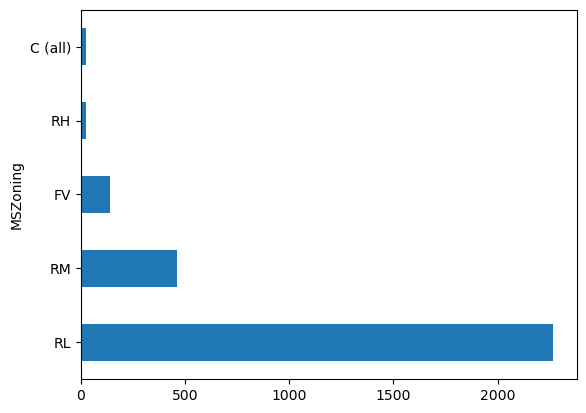

In [28]:
data["MSZoning"].value_counts().plot(kind="barh")

<Axes: ylabel='LotConfig'>

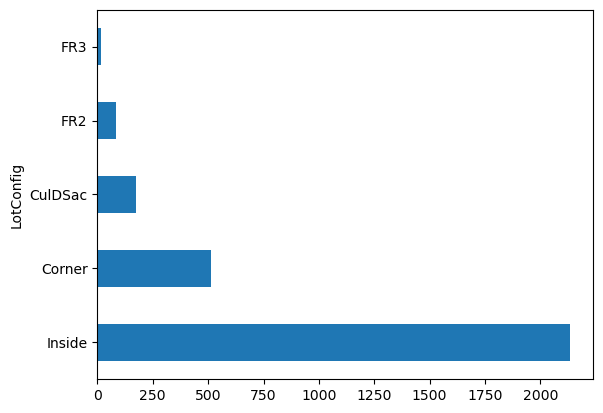

In [29]:
data["LotConfig"].value_counts().plot(kind="barh")

<Axes: ylabel='BldgType'>

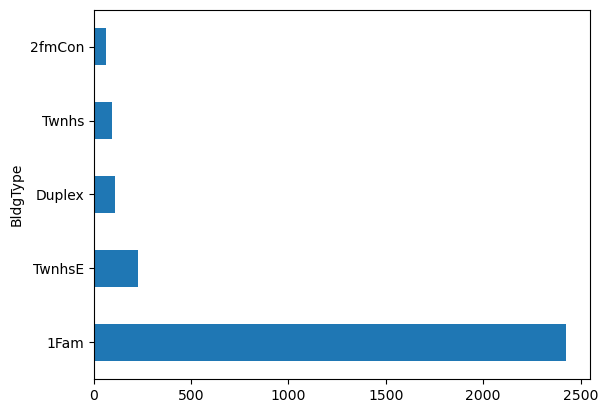

In [30]:
data["BldgType"].value_counts().plot(kind="barh")

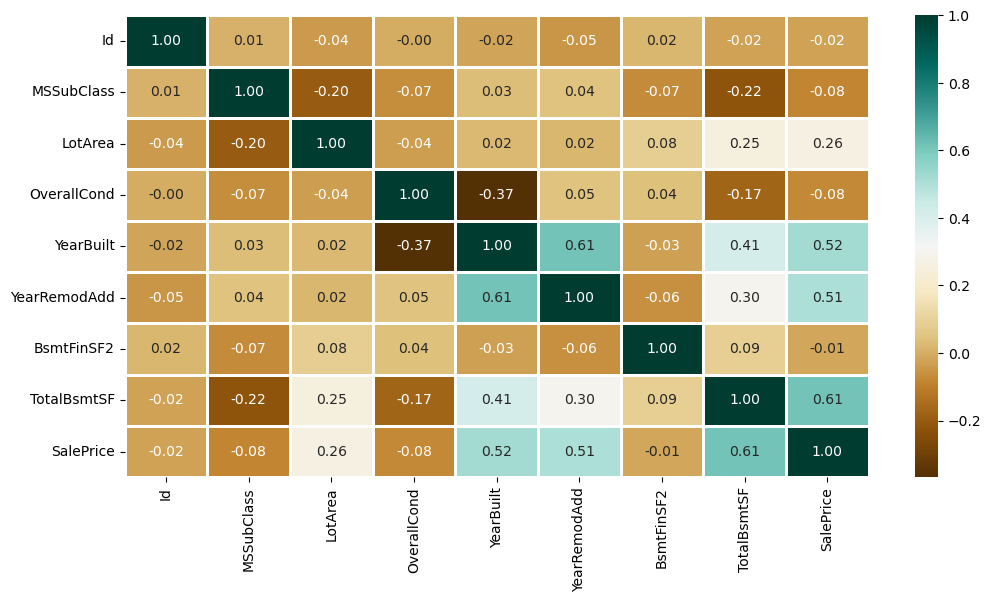

In [9]:
numeric_data = data.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12, 6))
sns.heatmap(numeric_data.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

plt.show()

<Axes: title={'center': 'No. Unique values of Categorical Features'}>

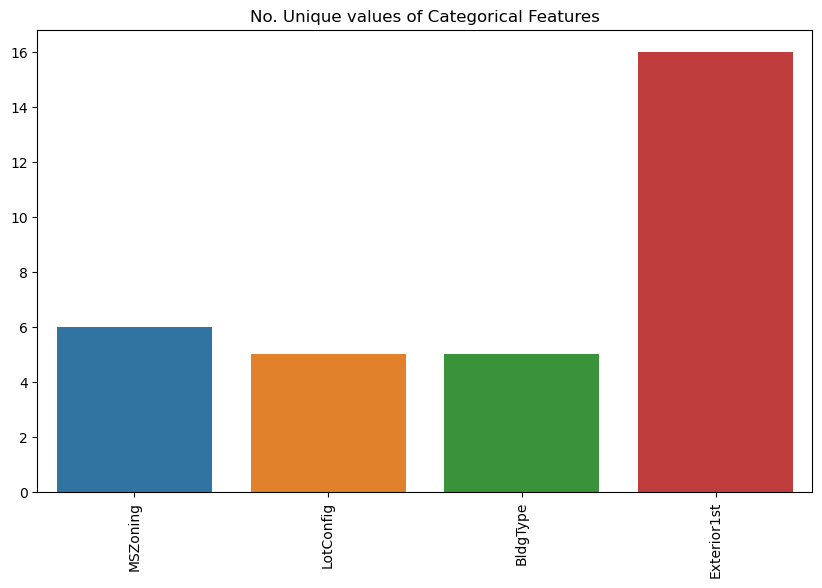

In [10]:
unique_values = []
for col in object_cols:
  unique_values.append(data[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

In [12]:
data.drop(['Id'],
             axis=1,
             inplace=True)

In [13]:
data['SalePrice'] = data['SalePrice'].fillna(data['SalePrice'].mean())

In [14]:
new_dataset = data.dropna()

In [15]:
new_dataset.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [16]:
from sklearn.preprocessing import OneHotEncoder
 
s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ', 
      len(object_cols))

Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


In [33]:
import warnings

warnings.filterwarnings("ignore")

from sklearn.preprocessing import OneHotEncoder
object_cols = ['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st'] 
OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index

feature_names = OH_encoder.get_feature_names_out(input_features=object_cols)

# Set the columns of OH_cols to the feature names
OH_cols.columns = feature_names

# Drop the original categorical columns from new_dataset
df_final = new_dataset.drop(object_cols, axis=1)

# Concatenate the one-hot encoded columns to new_dataset
df_final = pd.concat([df_final, OH_cols], axis=1)


In [18]:
from sklearn.model_selection import train_test_split
 
X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']
 

X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

In [23]:
from sklearn import svm
from sklearn.svm import SVC

model = svm.SVR()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_valid)

In [26]:

print(mean_absolute_percentage_error(Y_valid, Y_pred))


0.1870512931870423
